
 RAW DATA
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

 Data Size =  (50000, 10)

 VISUALIZE DATA PATTERNS BEFORE MODELING


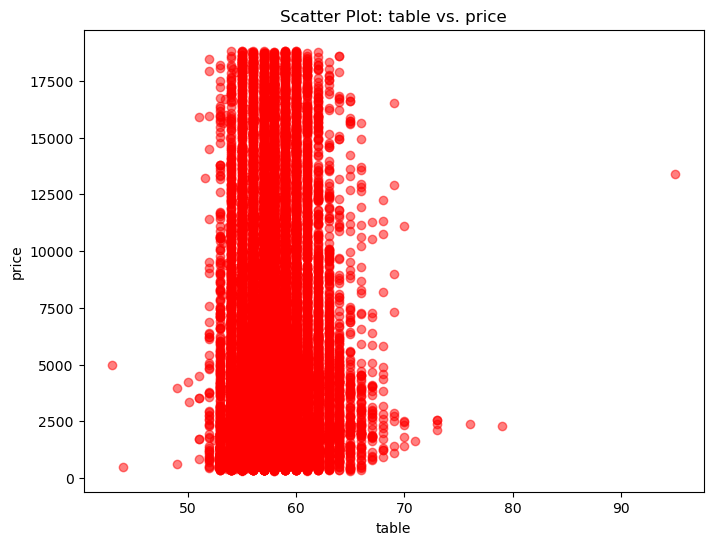


 DATA ENCODED
   carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  color_G  color_H  color_I  color_J  clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0          1            0              0        1        0        0        0        0        0           0            0            1            0            0             0             0
1   0.21   59.8   61.0    326  3.89  3.84  2.31         0          0            1              0        1        0        0        0        0        0           0            1            0            0            0             0             0
2   0.23   56.9   65.0    327  4.05  4.07  2.31         1          0            0              0        1        0        0        0        0        0           0            0            0            1            0             0             0
3   0.29   62

<Figure size 1200x800 with 0 Axes>

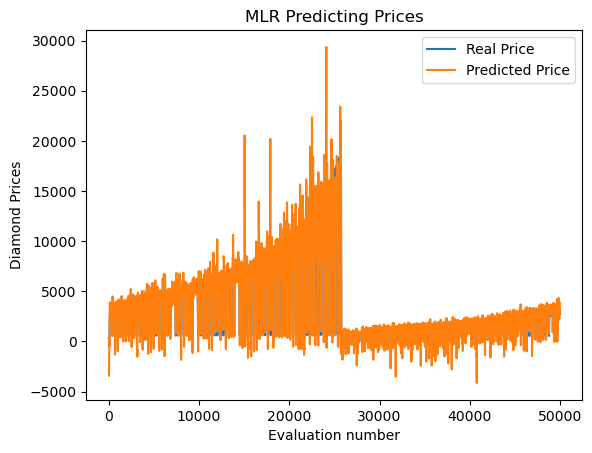


 Please press Enter-key to continue or enter 'q' to Quit: 

 RAW DATA
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

 Data Size =  (50000, 10)

 VISUALIZE DATA PATTERNS BEFORE MODELING


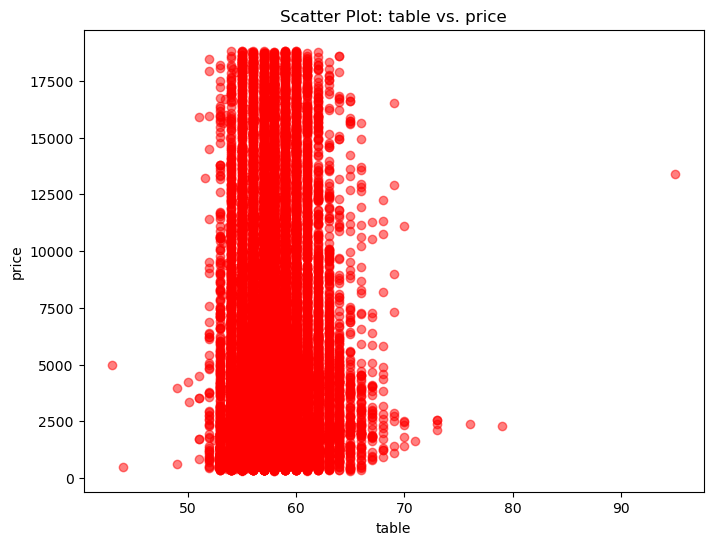


 DATA ENCODED
   carat  depth  table  price     x     y     z  cut_Good  cut_Ideal  cut_Premium  cut_Very Good  color_E  color_F  color_G  color_H  color_I  color_J  clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2
0   0.23   61.5   55.0    326  3.95  3.98  2.43         0          1            0              0        1        0        0        0        0        0           0            0            1            0            0             0             0
1   0.21   59.8   61.0    326  3.89  3.84  2.31         0          0            1              0        1        0        0        0        0        0           0            1            0            0            0             0             0
2   0.23   56.9   65.0    327  4.05  4.07  2.31         1          0            0              0        1        0        0        0        0        0           0            0            0            1            0             0             0
3   0.29   62

<Figure size 1200x800 with 0 Axes>

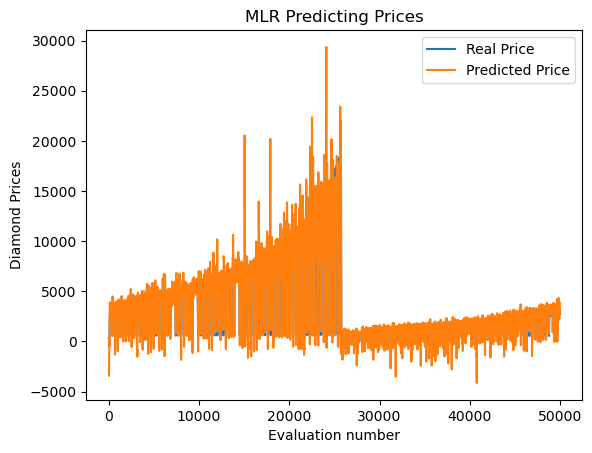


 Please press Enter-key to continue or enter 'q' to Quit: q


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

label_encoder = LabelEncoder()

class DiamondsLearningAgent_MLR:
    
    def load_data(self, file_path):
        
        df = pd.read_csv(file_path)
        self.df = df
        
        print('\n RAW DATA')
        print(df.head().to_string(index=True))
        
        print('\n Data Size = ', df.shape)
        
            
    def visualizeData_bef_modeling(self):   
        print('\n VISUALIZE DATA PATTERNS BEFORE MODELING')
        df = self.df
                
        x = df['table']
        y = df['price']

        # Create a scatter plot
        plt.figure(figsize=(8, 6))
        plt.scatter(x, y, marker='o', color='red', alpha=0.5)
        plt.xlabel('table')
        plt.ylabel('price')
        plt.title('Scatter Plot: table vs. price')
        plt.show()      
     
        
    def data_preprocessing(self):
        df = self.df            

        # Use one-hot encoding for categorical variables
        df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)
        
        print('\n DATA ENCODED')
        
        print(df.head().to_string(index=True))
        features = df[['carat', 'depth', 'table', 'x', 'y', 'z'] + list(df.columns[10:])]
        target = df['price']
        
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)
                      
        self.df = df
        self.X_train = X_train               
        self.X_test = X_test             
        self.y_train = y_train
        self.y_test = y_test                       
        
    def train_agent_predict_test(self):   
        X_train = self.X_train
        y_train = self.y_train
        X_test = self.X_test
        
        MLR_agent = LinearRegression()  
        MLR_agent.fit(X_train, y_train)
        self.MLR_agent = MLR_agent
        
        # Predict test data
        pred_y = MLR_agent.predict(X_test)
        self.pred_y = pred_y
        
        
    def evaluate_MLR_agent(self):     
        print('\n PERFORMANCE EVALUATIONS')
        
        pred_y = self.pred_y    
        y_test = self.y_test
        
        r2 = r2_score(y_test, pred_y)
        print("R-squared = ", r2)
        
        mse = mean_squared_error(y_test, pred_y)
        print("MSE = ", mse)                     
        
        # Visualize the predictions
        plt.figure(figsize=(12, 8))     
                    
        pd_pred = pd.DataFrame({'Real Price': y_test, 'Predicted Price': pred_y}) 
        pd_pred.sort_index().plot()          
        plt.title("MLR Predicting Prices")
        plt.xlabel('Evaluation number')
        plt.ylabel('Diamond Prices')               
        plt.show()       

    def predict_new_percept(self, carat, cut, color, clarity, depth, table, price, x, y, z): 
        caratList = [carat]
        
        carat_encoded = label_encoder.fit_transform(caratList) 
        
        new_pred = self.MLR_agent.predict([[carat_encoded[0], cut, color, clarity, depth, table, price, x, y, z] + [0] * (len(self.df.columns) - 10)])
        print('\n Predicted Diamond Prices = ', new_pred[0] + 1.5, 'amount')

#----------------------------Class Driver --------------------------------------    
agent = DiamondsLearningAgent_MLR()

# Update from environment
file_path = 'diamonds.csv'

while True: 

    agent.load_data(file_path)

    agent.visualizeData_bef_modeling()

    agent.data_preprocessing()

    agent.train_agent_predict_test()

    agent.evaluate_MLR_agent()   

    n = input("\n Please press Enter-key to continue or enter 'q' to Quit: ")
    if n.strip() == 'q':
        break
